# Problem 1

## (i)

In [6]:
import numpy as np

X = np.array([1,1,1])

def genAb(t0):
    b = []
    A = []
    for i in range(1,11,1):
        ti = t0 + i
        A.append([X[0]/ti, X[1]/(ti**2), X[2]/(ti**3)])
        bi = 1/ti + 1/(ti**2) + 1/(ti**3)
        b.append(bi)
    return np.asarray(A), np.asarray(b)

f = "{:<5} {:<22} {:<22} {:22} {:22}"
print(f.format("t0", "k_2(ATA)", "K_2(A)", "||x_norm-x_ex||_2", "||x_orth-x_ex||_2"))

for t in range(0,201,50):
    A, b = genAb(t)
    kAA = np.linalg.cond(np.dot(A.T,A))
    kA = np.linalg.cond(A)
    x_norm = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),b)
    x_orth = np.linalg.lstsq(A,b,rcond=None)[0]
    nerr = np.linalg.norm(x_norm - X, ord = 2)
    oerr = np.linalg.norm(x_orth - X, ord = 2)
    print(f.format(t, kAA, kA, nerr, oerr))

t0    k_2(ATA)               K_2(A)                 ||x_norm-x_ex||_2      ||x_orth-x_ex||_2     
0     2096.205362280255      45.78433533731756      1.1191598780537655e-13  3.794299872214038e-15
50    1658990319522.6843     1288017.9809951729       6.95208893918231e-08 1.8118772694539275e-10
100   288473813251642.8      16984516.8759972        3.335085190517825e-06  9.633699154209089e-10
150   6452086137564643.0     80324878.65019988       8.922858986742523e-05  5.178832132398207e-09
200   6.0116917093258424e+16 245187517.56409502     0.00047081258840903317 1.6505082665222676e-08


## (ii)

From Theorem 5.4.1, we know that the computational error $||x^{comp} - x^{ex}||_2$ is postive related with the conditional number of $A$ in LLS problem. Also Theorem 7.6.2 points out that the conditional number of $A^TA$ is the square of $A$'s. Therefore, using normal equation ($A^TAx = A^Tb$) will introduce more errors into the solution campared with using QR decomposition ($Ax = b$) to solve the LLS. This argument is confirmed with our simulation results.

# Problem 2

## (i)

Let $r = b - Ax$, then:
$\begin{bmatrix}
I & A\\
A^T & 0 
\end{bmatrix} \begin{bmatrix}
r\\
x
\end{bmatrix} = 
\begin{bmatrix}
r + Ax\\
A^Tr + 0
\end{bmatrix} = \begin{bmatrix}
b - Ax + Ax\\
A^Tb - A^TAx 
\end{bmatrix} = \begin{bmatrix}
b\\
0 
\end{bmatrix}$

The first component is by definition of $r = b - Ax$, and the second component is by Normal equation $A^TAx = A^Tb$

## (ii)

Algorithm:

Input: $A, b$
1. QR decomposition: $AP = Q\begin{pmatrix} R \\ 0 \end{pmatrix}$
2. Compute: $Q^Tb = \begin{pmatrix} c \\ d \end{pmatrix}$
3. Solve: $Ry = c$
4. Set: $x = Py$
5. Set: $r = b - Ax$

output: $solution = \begin{pmatrix} r \\ x \end{pmatrix}$

## (iii)

Algorithm:

Input: $A, b$
1. Singular Value Decomposition: $A = U\Sigma V^T = (U_1, U_2)\begin{pmatrix} \Sigma_1 & 0 \\ 0 & 0 \end{pmatrix}\begin{pmatrix} V_1^T \\ V_2^T \end{pmatrix}$, where: $U_1, V_1$ have $r = rank(A)$ columns
2. Set: $x = V_1\Sigma_1^{-1}U_1^Tb$
3. Set: $r = b - Ax$

output: $solution = \begin{pmatrix} r \\ x \end{pmatrix}$

# Problem 3

## (i)

Let $a3 = (t_1^2, t_2^2, ..., t_m^2) \in R^{m\times 1}$ Then $\tilde{A} = [A,a3] \in R^{m\times 3}$, and $\tilde{b} = b$ in original least squares problem.

## (ii)

Previously: $A = \begin{pmatrix} 1 & t_1 \\ 1 & t_2 \\ ... & ... \\ 1 & t_m \end{pmatrix}$,   $Q_2Q_1A = \begin{pmatrix} 1 & t_1 \\ 0 & t_2' \\ ... & ... \\ 0 & 0 \end{pmatrix} = \begin{pmatrix} R \\ 0 \end{pmatrix} \in \mathbb{R}^{m \times 2}, R = \begin{pmatrix} 1 & t_1 \\ 0 & t_2'\end{pmatrix}$

Now: $\tilde{A} = \begin{pmatrix} 1 & t_1 & t_1^2 \\ 1 & t_2 & t_2^2 \\ 1 & t_3 & t_3^2 \\... & ... & ...\\ 1 & t_m & t_m^2 \end{pmatrix}$, $Q_2Q_1\tilde{A} = \begin{pmatrix} 1 & t_1 & t_1^2\\ 0 & t_2' & t_2^{'2}\\ 0 & 0 & t_3^{'2} \\... & ... \\ 0 & 0 & t_m^{'2}\end{pmatrix}$

since we have already solved $Q_1, Q_2$, we only need to find $Q_3$ such that: 

$Q_3Q_2Q_1\tilde{A} = \begin{pmatrix} 1 & t_1 & t_1^{2}\\ 0 & t_2' & t_2^{'2}\\ 0 & 0 & t_3^{''2} \\... & ... & ... \\ 0 & 0 & 0 \end{pmatrix} = \begin{pmatrix} R \\ 0 \end{pmatrix} \in \mathbb{R}^{m \times 3}, R = \begin{pmatrix} 1 & t_1 & t_1^{2}\\ 0 & t_2' & t_2^{'2} \\ 0 & 0 & t_3^{''2}\end{pmatrix}$

Then we can apply the same procedure in problem 2 to solve LLS Problem.

## (iii)

In [9]:
import scipy.linalg as linalg

def genAb3():
    b = []
    A = []
    for i in range(1,11,1):
        ti = i/5
        A.append([1, ti, ti**2])
        bi = 1 + ti + ti**2
        b.append(bi)
    return np.asarray(A), np.asarray(b)

def QR_LS(A,b):
    n = A.shape[1]
    q,r = linalg.qr(A)
    print(b)
    y = np.dot(q.T,b)[:n]
    R = r[:n,:]
    x = np.linalg.solve(R,y)
    return x

In [10]:
a, b = genAb3()

x_qr = QR_LS(a,b)
x_ls = np.linalg.lstsq(a,b,rcond=None)[0]

[1.24 1.56 1.96 2.44 3.   3.64 4.36 5.16 6.04 7.  ]


In [4]:
print("The solution x of QR-decomposition is:", x_qr)
print("The solution x of numpy.linalg.lstsq is:", x_ls)

The solution x of QR-decomposition is: [1. 1. 1.]
The solution x of numpy.linalg.lstsq is: [1. 1. 1.]


# Problem 4

## (i)

(200, 100) [[1.23409804e-04 2.21354835e-04 3.89326190e-04 ... 1.14662616e-19
  3.07065550e-20 8.06353736e-21]
 [8.47296290e-05 1.77296480e-04 3.29184662e-04 ... 2.72378563e-06
  1.05991380e-05 3.34286337e-05]
 [7.66534694e-05 1.51024285e-04 2.77454771e-04 ... 5.55329687e-06
  1.48728770e-05 3.55774578e-05]
 ...
 [1.51715141e-01 1.57662277e-01 1.63716960e-01 ... 1.34736852e-01
  1.40231528e-01 1.45897772e-01]
 [1.46073570e-01 1.51857186e-01 1.57769476e-01 ... 1.29702816e-01
  1.34976504e-01 1.40439890e-01]
 [1.40646627e-01 1.46247883e-01 1.51997904e-01 ... 1.24933417e-01
  1.29970557e-01 1.35214409e-01]]


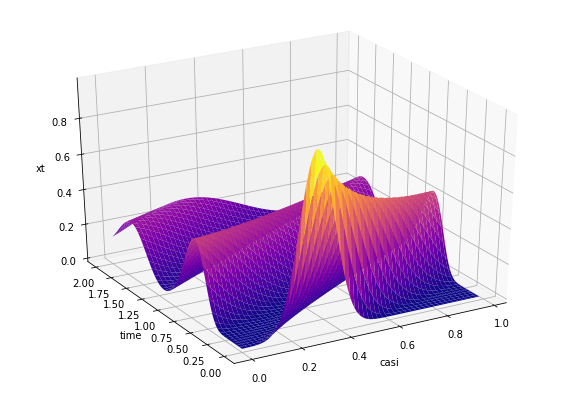

In [13]:
n = 100
alpha = 0.01
beta = 1
h = 1/(n+1)

def genB():
    b = np.zeros((n,n))
    for i in range(n-1):
        b[i,i-1] = -(alpha + h*beta)
        b[i,i] = 2*alpha + h*beta
        b[i,i+1] = -1*alpha

    b[n-1,0] = -1*alpha
    b[n-1,n-2] = -(alpha + h*beta)
    b[n-1,n-1] = 2*alpha + h*beta
    Bmat = b*(-h**(-2))
    return Bmat

def x0_ex():
    x0 = []
    casi = []
    for j in range(n):
        casij = j*h
        casi.append(casij)
        x0j = np.exp((casij - 0.3)**2/(-0.01))
        x0.append(x0j)
    return np.array(x0), np.array(casi)

B = genB()
x0, casi = x0_ex()

Xt = []
for i in range(200):
    t = i/100
    xt = linalg.expm(B*t).dot(x0)
    Xt.append(xt)
    
Xt = np.array(Xt)
print(Xt.shape,Xt)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

time = np.arange(0,2,0.01)
casi, time = np.meshgrid(casi, time)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('casi')
ax.set_ylabel('time')
ax.set_zlabel('xt')
ax.azim = -120
ax.plot_surface(casi, time, Xt, cmap="plasma")

plt.show()

## (ii)

Let $E_i = exp(Bt_i) \in R^{n\times n}, i = 1, 2, ..., m$. Thus our least squares problem is defined by:

$A = [HE_1, HE_2, ..., HE_m]^T \in R^{mk \times n}$

$b = [z_1, z_2, ..., z_m]^T \in R^{mk \times 1}$, where: $z_i = Hx(t_i), i =1,2, ..., m$

$x = x_0 \in R^{n}$

## (iii)

In [7]:
def genH(n,k):
    H = np.zeros((k,n))
    for i in range(k):
        for j in range(n):
            if (j+1) == (n*(i+1)/k):
                H[i,j] = 1
    return H

def genE(B, t):
    E = linalg.expm(B*t)
    return E 

def genz(H, E, x0):
    z = np.dot(np.dot(H, E),x0)
    return z

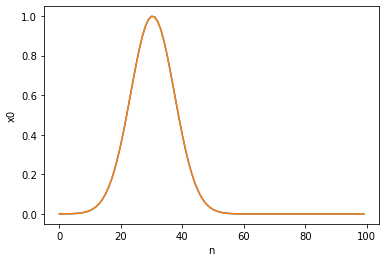

In [8]:
n = 100
alpha = 0.01
beta = 1
h = 1/(n+1)
k = 20

B = genB()
H = genH(n,k)
x0, casi = x0_ex()

A = np.empty([1,n])
b = np.empty([1,1])

for t100 in range(2,51,2):
    ti = t100/100
    E = genE(B,ti)
    ai = np.dot(H,E)
    bi = genz(H,E,x0).reshape((k,1))
    A = np.vstack((A,ai))
    b = np.vstack((b,bi))
    

x0_ls = np.linalg.lstsq(A[1:,:],b[1:,:],rcond=None)[0]

plt.plot(x0)
plt.xlabel('n')
plt.ylabel('x0')
plt.plot(x0)

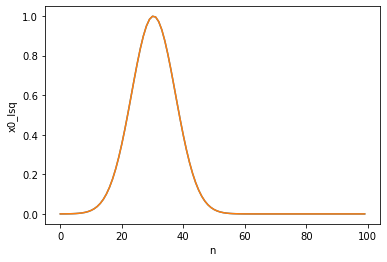

In [9]:
plt.plot(x0)
plt.xlabel('n')
plt.ylabel('x0_lsq')
plt.plot(x0_ls)

## (iv)

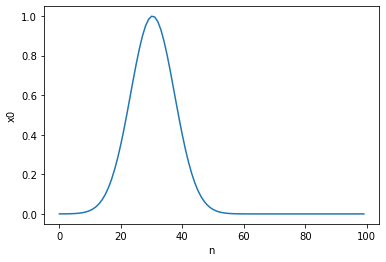

In [10]:
n = 100
alpha = 0.01
beta = 1
h = 1/(n+1)
k = 20

B = genB()
H = genH(n,k)
x0, casi = x0_ex()

A = np.empty([1,n])
b = np.empty([1,1])

for t100 in range(2,51,2):
    ti = t100/100
    E = genE(B,ti)
    ai = np.dot(H,E)
    bi = ((1 + 0.1*np.random.randn(k))*genz(H,E,x0)).reshape((k,1))
    A = np.vstack((A,ai))
    b = np.vstack((b,bi))
    

x0_ls = np.linalg.lstsq(A[1:,:],b[1:,:],rcond=None)[0]

plt.plot(x0)
plt.xlabel('n')
plt.ylabel('x0')
plt.show()

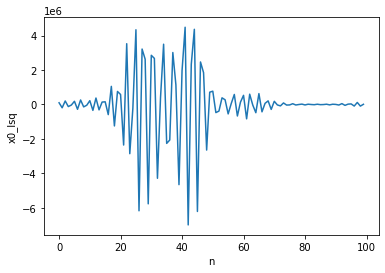

In [11]:
plt.xlabel('n')
plt.ylabel('x0_lsq')
plt.plot(x0_ls)

## (v)

The condition number of A is: 75306886462465.19


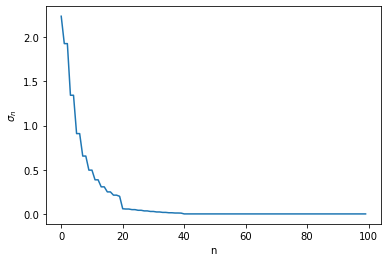

In [12]:
u,s,vh = np.linalg.svd(A[1:,:])
plt.xlabel("n")
plt.ylabel("$\sigma_n$")
plt.plot(s)
print("The condition number of A is:", s[1]/s[-1])

Due to the large conditional number of this leeast squares problem, a small measurement error added in data ($z_j)$ leads to big changes in the solution.